# The Central Limit Theorem

The *Central Limit Theorem* states that if we draw a simple random sample of size $n$ from any population with mean $\mu$ and standard deviation $\sigma$, if $n$ is large the distribuion of the sample means is approximately normal of the form

$$N(\mu, \frac{\sigma}{n})$$

This activity is meant to offer an example of the central limit theorem in action, and the effect of using different sample sizes in forming the distribution of sample means. 

### Baseball Salaries

![](images/baseballs.png)


The dataset below represents Major League Baseball player salaries from the year 2020, and was gathered from USA Today's databases. Below, the dataset is loaded and we examine the features and datatypes. 

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

In [55]:
#read in the data
baseball_salaries = pd.read_csv('./data/baseball.csv', index_col=0)
baseball_salaries.salary = baseball_salaries.salary/1e6

In [56]:
#Examine the .info()
baseball_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797 entries, 1 to 797
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team         797 non-null    object 
 1   leagueID     797 non-null    object 
 2   player       797 non-null    object 
 3   salary       797 non-null    float64
 4   position     797 non-null    object 
 5   gamesplayed  797 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 43.6+ KB


In [57]:
#First few rows
baseball_salaries.head()

,team,leagueID,player,salary,position,gamesplayed
1,ANA,AL,anderga0,6.200,CF,112
2,ANA,AL,colonba0,11.000,P,3
3,ANA,AL,davanje0,0.375,CF,108
4,ANA,AL,donnebr0,0.375,P,5
5,ANA,AL,eckstda0,2.150,SS,142


In [58]:
baseball_salaries.describe()

,salary,gamesplayed
count,797.000000,797.000000
mean,2.497669,63.705144
std,3.535925,53.621952
min,0.300000,1.000000
25%,0.335000,14.000000
50%,0.800000,49.000000
75%,3.000000,112.000000
max,22.500000,162.000000


### Task

Our goal is to take samples from the salary data and build a distribution of these sample means.  To begin, draw a histogram of the salaries.  Note the skew and lack of normality in this distribution.    

Text(0, 0.5, 'Counts')

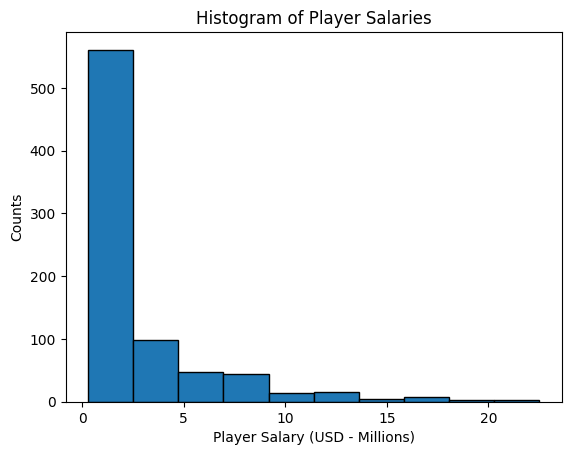

In [69]:
#histogram of the salaries
ax = baseball_salaries.plot(kind="hist", y="salary", title="Histogram of Player Salaries", legend=False, edgecolor="black")
ax.set_xlabel("Player Salary (USD - Millions)")
ax.set_ylabel("Counts")

1769.3400059003231
1769.3400000000001
0.3170673810573434


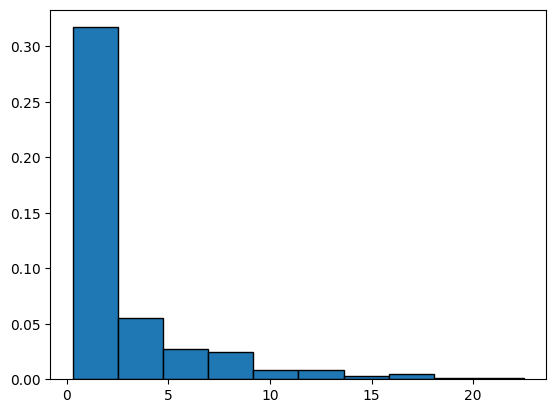

In [76]:
plt.hist(baseball_salaries.salary, density=True, edgecolor='black', label="Population")
print(561/0.31706738)
xx = (2.52 - 0.3)*797
print(xx)
print(561/xx)

### Taking Samples

Pandas DataFrame's have built in methods for taking random samples with replacement.  The `.sample()` method is demonstrated below.

In [68]:
baseball_salaries['salary'].sample(4)

735     1.750
54      0.335
678     1.100
116    11.500
Name: salary, dtype: float64

In [ ]:
pop_mean = np.mean(baseball_salaries['salary'].to_list())
pop_std = np.std(baseball_salaries['salary'].to_list())
display(pop_mean)
display(pop_std)
gauss = norm(loc=pop_mean, scale=pop_std)
x_pop = np.linspace(-1, 1, 1000)*3*gauss.std() + gauss.mean()
plt.plot(x_pop, gauss.pdf(x_pop), color='red', linewidth=2, label = 'Normal PDF - Population')


### Sample Means

Now, use this method to repeatedly take samples and build a list of sample means.  As a starting place let us take 1000 samples of size 5 and draw the histogram of the sample means.  What is the mean and standard deviation? 

2.4846106736

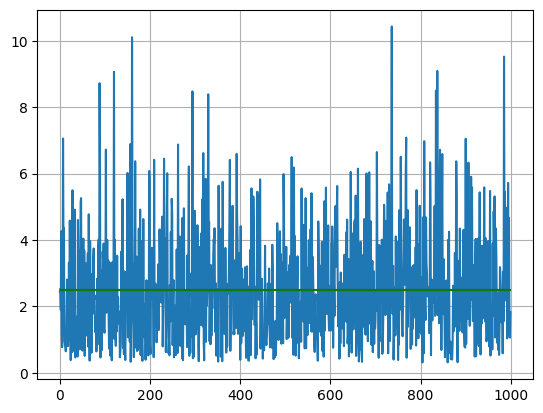

In [97]:
#empty list for sample means
sample_size = 5
sample_means = []
for k in range(1000):
    sample_means.append(baseball_salaries['salary'].sample(sample_size).mean())

plt.plot(sample_means)
plt.grid(True)
ax = plt.hlines(pop_mean, 0, len(sample_means), color="red")
ax = plt.hlines(np.mean(sample_means), 0, len(sample_means), color="green")
display(np.mean(sample_means))

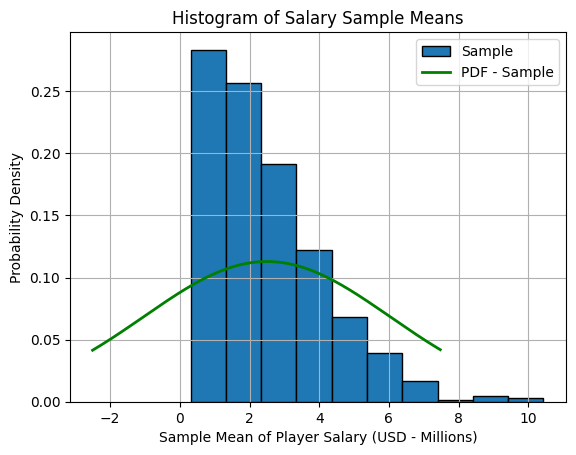

In [98]:
#histogram of sample means
out = plt.hist(sample_means, density=True, edgecolor='black', label="Sample")
bins = out[1]
plt.title("Histogram of Salary Sample Means")
plt.xlabel("Sample Mean of Player Salary (USD - Millions)")
plt.ylabel("Probability Density")

samples_mean = np.mean(sample_means)
samples_std = np.std(sample_means)

#gauss = norm(loc=samples_mean, scale=samples_std)

gauss_sample = norm(loc=samples_mean, scale=samples_std)
x_sample = np.linspace(-1, 1, 1000)*3*gauss_sample.std() + gauss_sample.mean()
plt.plot(x_sample, gauss.pdf(x_sample), color='green', linewidth=2, label='PDF - Sample')
plt.legend()
plt.grid(True)


Repeat the above exercise with samples of size:

- 10
- 25
- 50
- 100

Your discussion post should explain how the distribution of these sample means changes as the sample size changes, and how the mean and standard deviation of the distributions change.

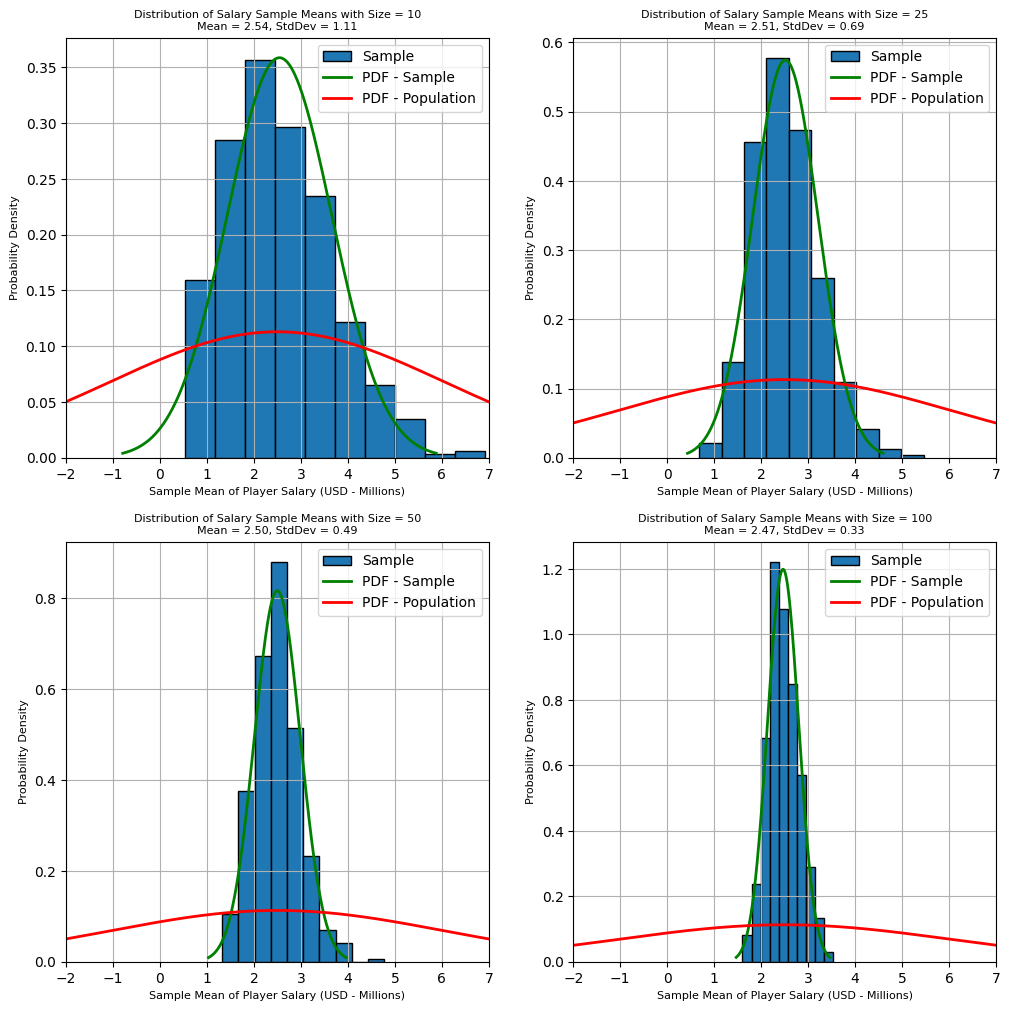

In [102]:
sample_sizes = [10, 25, 50, 100]
ax = plt.figure(figsize=(12, 12))

for m in range(len(sample_sizes)):
    sample_size = sample_sizes[m]
    sample_means = []
    for k in range(500):
        sample_means.append(baseball_salaries['salary'].sample(sample_size).mean())

    samples_mean = np.mean(sample_means)
    samples_std = np.std(sample_means)

    plt.subplot(2, 2, m + 1)
    plt.hist(sample_means, density=True, edgecolor='black', label="Sample")
    title = "Distribution of Salary Sample Means with Size = %d\nMean = %.2f, StdDev = %.2f" % (sample_size, samples_mean, samples_std)
    fontdict = {"size":8}
    plt.title(title, fontdict=fontdict)
    plt.xlabel("Sample Mean of Player Salary (USD - Millions)", fontdict=fontdict)
    plt.ylabel("Probability Density", fontdict=fontdict)

    gauss_sample = norm(loc=samples_mean, scale=samples_std)
    x_sample = np.linspace(-1, 1, 1000)*3*gauss_sample.std() + gauss_sample.mean()
    plt.plot(x_sample, gauss_sample.pdf(x_sample), color='green', linewidth=2, label='PDF - Sample')

    plt.plot(x_pop, gauss.pdf(x_pop), color='red', linewidth=2, label='PDF - Population')

    plt.legend(loc='upper right')
    plt.grid(True)
    plt.xlim(-2, 7)

ax.figure.savefig("./plots/Distribution of Sample Means.png")